In [69]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [70]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
cac40

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


In [71]:
Tickers = cac40.iloc[[5], [3]]
symbols = Tickers['Ticker'].to_list()
symbols

['BNP.PA']

In [72]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [115]:
data_1 = yf.Ticker(symbols[0])
BNP = data_1.history(interval ='1d', start = '2021-5-24', end = '2023-5-24')

In [120]:
BNP = BNP[['Close']]
returns= np.log(BNP['Close'] / BNP['Close'].shift(1)).dropna()

Text(0.5, 1.0, 'BNP returns')

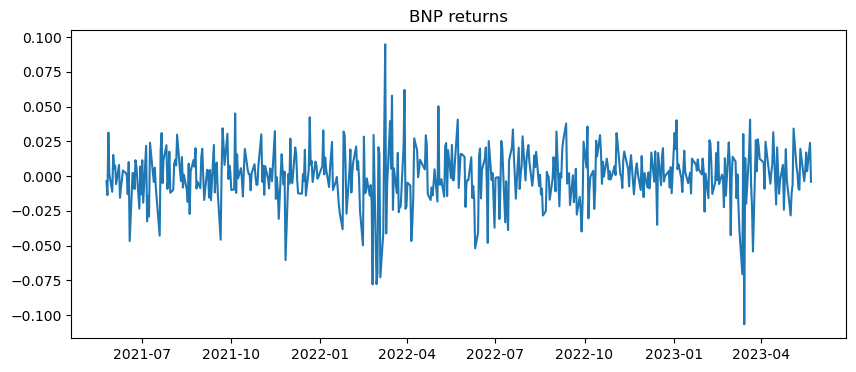

In [121]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.title('BNP returns')

In [125]:
returns.kurtosis()

3.4358167812267943

the Series is Platykurtic (Kurtosis > 3)

In [140]:
from statsmodels.tsa.stattools import adfuller

In [141]:
adftest = adfuller(returns)

In [142]:
print('pvalue of adfuller test is :', adftest[1])

pvalue of adfuller test is : 0.0


In [144]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(returns, trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2543.060, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2548.354, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2546.881, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2546.895, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2550.179, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2544.915, Time=0.47 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.857 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  515
Model:                        SARIMAX   Log Likelihood                1276.090
Date:                Tue, 30 May 2023   AIC                          -2550.179
Time:                        17:04:04   BIC                          -2545.935
Sample:                             0   HQIC                         -2548.516
                                - 515                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   1.57e-05     26.230      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):               278.78
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.61
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
model = ARIMA(returns, order=(0,1,0))
model_fit = model.fit()

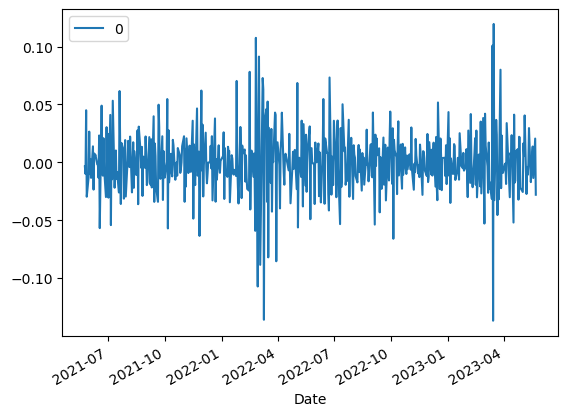

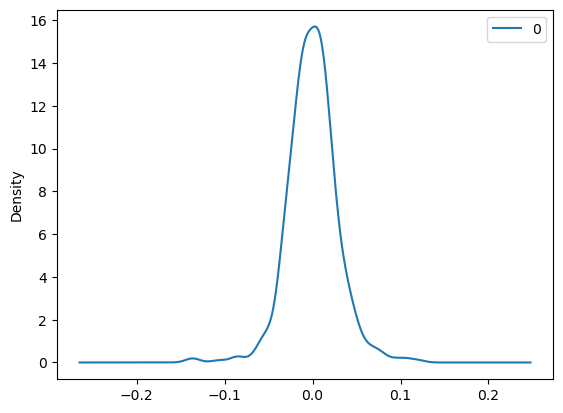

                0
count  515.000000
mean    -0.000008
std      0.028277
min     -0.136897
25%     -0.016078
50%     -0.000083
75%      0.014975
max      0.119536


In [147]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())